In [1]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EMR.csv')

In [3]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,01-06-1972,3.541667,0.000000,314400,3.578125,3.552083,0.825108
1,02-06-1972,3.541667,3.552083,1396800,3.562500,3.552083,0.825108
2,05-06-1972,3.531250,3.552083,372000,3.557292,3.536458,0.821478
3,06-06-1972,3.541667,3.541667,177600,3.562500,3.541667,0.822689
4,07-06-1972,3.479167,3.526042,379200,3.526042,3.479167,0.808170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12710 entries, 0 to 12709
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            12710 non-null  object 
 1   Low             12710 non-null  float64
 2   Open            12710 non-null  float64
 3   Volume          12710 non-null  int64  
 4   High            12710 non-null  float64
 5   Close           12710 non-null  float64
 6   Adjusted Close  12710 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 695.2+ KB


In [5]:
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,12710.000000,12710.000000,1.271000e+04,12710.000000,12710.000000,12710.000000
mean,28.175559,28.473396,2.246376e+06,28.759109,28.474279,20.365279
std,24.475592,24.721799,1.841574e+06,24.950360,24.715370,23.036478
min,1.739583,0.000000,0.000000e+00,1.833333,1.812500,0.436024
25%,5.708333,5.750000,8.739000e+05,5.781250,5.750000,1.994587
50%,23.767500,24.217500,1.861900e+06,24.530000,24.235000,12.853905
75%,47.157500,47.794999,3.128100e+06,48.279999,47.830002,33.682445
max,104.900002,105.809998,2.482280e+07,105.989998,105.699997,103.332047


### Plotting the Stock Data

#### Lets plot the Closing Price of Stock

Text(0.5, 1.0, 'EMR Stock Close Price Plot')

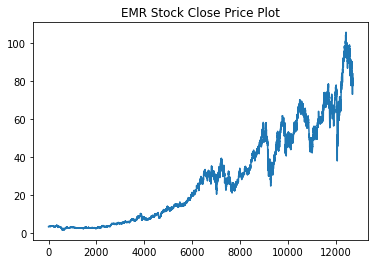

In [6]:
plt.plot(df['Close'])
plt.title('EMR Stock Close Price Plot')

#### Lets plot the Opening Price of Stock

Text(0.5, 1.0, 'EMR Stock Open Price Plot')

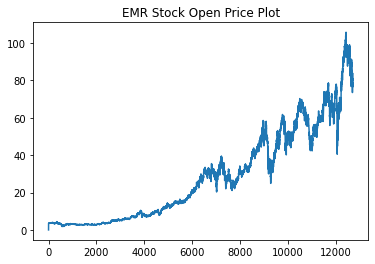

In [7]:
plt.plot(df['Open'])
plt.title('EMR Stock Open Price Plot')

### Scaling the data as LSTM's are sensitive to numeric values, this is a good paractice to normalise values before applying any ML algorithm, if you have data across uneven ranges over a lot of parameters

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df_1 = df['Close']
df_2 = df['Open']

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))
df_2 = scaler.fit_transform(np.array(df_2).reshape(-1,1))

In [11]:
df_1, df_2

(array([[0.01674487],
        [0.01674487],
        [0.01659447],
        ...,
        [0.75406092],
        [0.78303459],
        [0.78943568]]),
 array([[0.        ],
        [0.03357039],
        [0.03357039],
        ...,
        [0.76788585],
        [0.7608922 ],
        [0.79056803]]))

In [12]:
df_1.shape, df_2.shape

((12710, 1), (12710, 1))

### Handling Sequential Data for Train Test Split
Now Since we are working on time series data its always we have to split sequentially for train_test_split

In [13]:
#Split is 70% train and 30% test for the Close Price Predection
cp_train_size=int(len(df_1)*0.70)  
cp_test_size=len(df_1)-cp_train_size

In [14]:
#Split is 70% train and 30% test for the Open Price Predection
op_train_size=int(len(df_2)*0.70)  
op_test_size=len(df_2)-op_train_size

In [15]:
cp_train_data, cp_test_data=df_1[0:cp_train_size,:], df_1[cp_train_size:len(df_1),:1]
op_train_data, op_test_data=df_2[0:op_train_size,:], df_2[op_train_size:len(df_2),:1]

In [16]:
cp_train_data.shape, cp_test_data.shape, op_train_data.shape, op_test_data.shape

((8897, 1), (3813, 1), (8897, 1), (3813, 1))

### Now lets create the dataset
 Reshape into X=t, t+1, t+2,...t+99 and Y=t+100

In [17]:
def create_dataset(dataset, time_stamp=1):
    data_X, data_Y = [],[]
    for i in range(len(dataset)-time_stamp-1):
        #print(i)
        a = dataset[i:(i+time_stamp),0]
        #print(a)
        data_X.append(a)
        b = dataset[i+time_stamp,0]
        #print(b)
        data_Y.append(b)
    return np.array(data_X), np.array(data_Y)

In [18]:
# Reshape into X=t, t+1, t+2,...,t+99 and Y=t+100
time_step = 100
cp_X_train, cp_Y_train = create_dataset(cp_train_data, time_step)
cp_X_test, cp_Y_test = create_dataset(cp_test_data, time_step)

In [19]:
print(cp_X_train)

[[0.01674487 0.01674487 0.01659447 ... 0.01819877 0.01814864 0.0182489 ]
 [0.01674487 0.01659447 0.01664461 ... 0.01814864 0.0182489  0.0180985 ]
 [0.01659447 0.01664461 0.016043   ... 0.0182489  0.0180985  0.01814864]
 ...
 [0.39463364 0.39376732 0.39280472 ... 0.42755385 0.44247383 0.43920106]
 [0.39376732 0.39280472 0.38539285 ... 0.44247383 0.43920106 0.43400316]
 [0.39280472 0.38539285 0.3926122  ... 0.43920106 0.43400316 0.44699797]]


In [20]:
print(cp_X_test)

[[0.45970402 0.45267719 0.4508483  ... 0.46894477 0.47568284 0.47847433]
 [0.45267719 0.4508483  0.43862353 ... 0.47568284 0.47847433 0.47934065]
 [0.4508483  0.43862353 0.4412225  ... 0.47847433 0.47934065 0.48088078]
 ...
 [0.81614728 0.83347375 0.83597648 ... 0.73548313 0.75329084 0.7680183 ]
 [0.83347375 0.83597648 0.83511012 ... 0.75329084 0.7680183  0.76416796]
 [0.83597648 0.83511012 0.84771989 ... 0.7680183  0.76416796 0.75406092]]


In [21]:
time_step = 100
op_X_train, op_Y_train = create_dataset(op_train_data, time_step)
op_X_test, op_Y_test = create_dataset(op_test_data, time_step)

In [22]:
print(op_X_test.shape, op_X_train.shape, op_Y_test.shape, op_Y_train.shape)

(3712, 100) (8796, 100) (3712,) (8796,)


In [23]:
print(cp_X_test.shape, cp_X_train.shape, cp_Y_test.shape, cp_Y_train.shape)

(3712, 100) (8796, 100) (3712,) (8796,)


### Now we need to reshape the inputs to a 3D array of [samples, time steps, features] for the LSTM

In [24]:
cp_X_train = cp_X_train.reshape(cp_X_train.shape[0], cp_X_train.shape[1],1)
cp_X_test = cp_X_test.reshape(cp_X_test.shape[0], cp_X_test.shape[1],1)
op_X_train = op_X_train.reshape(op_X_train.shape[0], op_X_train.shape[1],1)
op_X_test = op_X_test.reshape(op_X_test.shape[0], op_X_test.shape[1],1)

In [25]:
print(op_X_test.shape, op_X_train.shape, op_Y_test.shape, op_Y_train.shape)

(3712, 100, 1) (8796, 100, 1) (3712,) (8796,)


In [26]:
print(cp_X_test.shape, cp_X_train.shape, cp_Y_test.shape, cp_Y_train.shape)

(3712, 100, 1) (8796, 100, 1) (3712,) (8796,)


### Now lets create the LSTM Model using Tensorflow

In [27]:
#Lets create Stacked LSTM's model, by importing libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1))) #Input Layer 1, 50 Neurons with 100 Time Steps
model.add(LSTM(50, return_sequences=True)) #Layer 2 with 50 neurons
model.add(LSTM(50, return_sequences=True)) #Layer 3 with 50 neurons
model.add(LSTM(50)) #Another Layer with 50 Neurons
model.add(Dense(1)) #Final Layer 
model.compile(loss="mean_squared_error", optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


### Model Training for Stock 'Close' Price Prediction

In [30]:
model.fit(cp_X_train, cp_Y_train, validation_data=(cp_X_test, cp_Y_test), epochs=5, batch_size=64, verbose=1)

Epoch 1/5
138/138 [==============================] - 12s 39ms/step - loss: 9.4149e-04 - val_loss: 0.0027
Epoch 2/5
138/138 [==============================] - 4s 32ms/step - loss: 7.6893e-05 - val_loss: 0.0017
Epoch 3/5
138/138 [==============================] - 4s 32ms/step - loss: 7.4356e-05 - val_loss: 0.0019
Epoch 4/5
138/138 [==============================] - 5s 33ms/step - loss: 6.8597e-05 - val_loss: 0.0018
Epoch 5/5
138/138 [==============================] - 5s 34ms/step - loss: 7.7307e-05 - val_loss: 0.0012


In [34]:
model.save('RNN Model')

INFO:tensorflow:Assets written to: RNN Model\assets


INFO:tensorflow:Assets written to: RNN Model\assets


### Lets Visualize our Model

In [31]:
'''import ann_visualizer
import graphviz
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, title='RNN')'''

"import ann_visualizer\nimport graphviz\nfrom ann_visualizer.visualize import ann_viz\nann_viz(model, view=True, title='RNN')"

### Load the Saved Model

In [28]:
loaded_model = tensorflow.keras.models.load_model('RNN Model')

### Making Predictions

In [42]:
cp_X_test_predictions = loaded_model.predict(cp_X_test)
cp_X_train_predictions = loaded_model.predict(cp_X_train)

In [43]:
cp_X_test_predictions

array([[0.48089194],
       [0.4773127 ],
       [0.47429565],
       ...,
       [0.69069207],
       [0.6932552 ],
       [0.696044  ]], dtype=float32)

In [44]:
cp_X_test_predictions_transformed = scaler.inverse_transform(cp_X_test_predictions)
cp_X_train_predictions_transformed = scaler.inverse_transform(cp_X_train_predictions)

In [32]:
cp_X_test_predictions_transformed

array([[50.883175],
       [50.504456],
       [50.185223],
       ...,
       [73.08212 ],
       [73.35333 ],
       [73.648415]], dtype=float32)

### Calculating Metrics

In [33]:
import math

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(cp_Y_test, cp_X_test_predictions_transformed)

57.4505174588375

In [37]:
math.sqrt(mean_squared_error(cp_Y_test, cp_X_test_predictions_transformed))

59.070351821854246

### Now lets Plot the Predictions

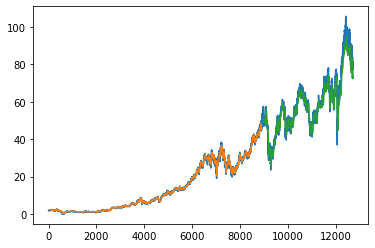

In [46]:
### Plotting 
# shift train predictions for plotting
look_back=100

trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(cp_X_train_predictions_transformed)+look_back, :] = cp_X_train_predictions_transformed

testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(cp_X_train_predictions_transformed)+(look_back*2)+1:len(df_1)-1, :] = cp_X_test_predictions_transformed

plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()